# <font color='royalblue'> Pre-stimulation period characterization

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%run data_prep_functions.ipynb

In [95]:
# Learning curves
lc = pd.read_csv('E:\learning_curves_all_rats.csv', header=0)

# Test runs - for performance and latency calculations
test_runs = pd.read_csv("E:\POSITION DATA\PRE PROCESSED/test_runs.csv")
below15_runs = pd.read_csv("E:\POSITION DATA\PRE PROCESSED/below15_runs.csv")

### Learning curves 

In [93]:
lc=pd.melt(lc, id_vars=['SESSION'], var_name=['RAT'], value_name='PERF')
lc.head()

,SESSION,RAT,PERF
0,-10,NPHR4,70.0
1,-9,NPHR4,77.0
2,-8,NPHR4,70.0
3,-7,NPHR4,70.0
4,-6,NPHR4,77.0


<ipython-input-94-dfd7182300f8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set(ylim=[0,100], xlim=[-10,-1], ylabel='Performance(%)+/- st.d.', xlabel='sessions before the protocol',


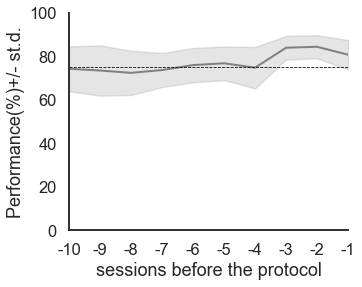

In [94]:
sns.set(style="white", context='talk')
plt.figure(figsize=(5,4))

a = sns.lineplot(
    data=lc, y='PERF', x='SESSION', color='gray',
    ci='sd', linewidth=2, legend=False)
plt.axhline(75,linestyle='dashed', c='black', linewidth=.8)
a.set(ylim=[0,100], xlim=[-10,-1], ylabel='Performance(%)+/- st.d.', xlabel='sessions before the protocol',
     xticklabels=range(-10,0,1), xticks=range(-10,0,1))
sns.despine()

### Performance of groups 

In [84]:
prestim_runs = test_runs[test_runs['stim_condition']==-1]

In [85]:
prestim_runs.head()

,session,rat,run_nr,start_timestamp,run_type,stim_condition,outcome,group,cp_entry_timestamp,cp_exit_timestamp,latency_to_cp_entry,latency_to_cp_exit,time_in_cp
164,2019-09-23T11_17_17,NPHR2,13.0,341.496461,T,-1,1.0,NPHR,448.159398,454.176358,106.662938,112.679898,6.016960
165,2019-09-23T11_17_17,NPHR2,15.0,619.674240,T,-1,1.0,NPHR,716.528026,721.910374,96.853786,102.236134,5.382349
166,2019-09-23T11_17_17,NPHR2,17.0,973.039245,T,-1,1.0,NPHR,1135.724877,1138.542259,162.685632,165.503014,2.817382
167,2019-09-23T11_17_17,NPHR2,19.0,1267.451738,T,-1,1.0,NPHR,1299.906368,1308.647603,32.454630,41.195866,8.741235
168,2019-09-23T11_17_17,NPHR2,21.0,1548.809088,T,-1,1.0,NPHR,1665.640986,1666.832717,116.831898,118.023629,1.191731


In [86]:
prestim_perf = prestim_runs.groupby(['group','rat']).apply(calc_performance_in_group).reset_index()
prestim_perf.rename({0:'performance'}, axis=1, inplace=True)

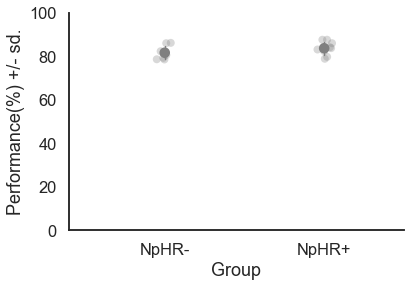

In [97]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(6,4))

g = sns.stripplot(
    x='group', y='performance', 
    data=prestim_perf, dodge=1, jitter=.05,
    alpha=.3, s=8, palette=['gray'],
)

# Show means
sns.pointplot(
    x='group', y='performance', data=prestim_perf,
    dodge=.4, join=False, markers="o", scale=.8,
    ci="sd", errwidth=1.4, palette=['gray'],
    
)
g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Group',
    ylim=(0, 100), xlim=(-0.6, 1.5), xticklabels=['NpHR-', 'NpHR+'])

sns.despine()

### Latency distributions

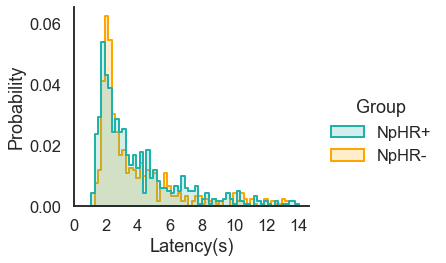

In [115]:
below15_runs = below15_runs[below15_runs['stim_condition']==-1]
sns.set(style='white', context='talk')

g = sns.displot(kind='hist', data=below15_runs, x='latency_to_cp_entry', 
                hue=below15_runs['group'].map({'CTRL':'NpHR-', 'NPHR':'NpHR+'}),
                stat='probability', element='step', palette=['lightseagreen', 'orange'], 
                bins=60, alpha=.2, height=4, aspect=1.2, linewidth=2)
g.set(xlabel='Latency(s)', xticks=range(0,16,2), xticklabels=range(0,16,2))
g._legend.set(title='Group')
sns.despine()

In [110]:
from scipy.stats import mannwhitneyu
ctrls = below15_runs[below15_runs['group']=='CTRL']
nphrs = below15_runs[below15_runs['group']=='NPHR']

u,p = mannwhitneyu(ctrls['latency_to_cp_entry'], nphrs['latency_to_cp_entry'])
print(u,p)

172453.0 0.37319886831919724
